<a href="https://colab.research.google.com/github/Malinovskiy159/web/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install -U scikit-learn category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.9 MB/s eta 0:00:00


In [4]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.9 MB 34.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390938 sha256=51ac4ea39d7cf08306db4bd2b98ba0925e3c854f734259de706da050e4e9f78b
  Stored in directory: /tmp/pip-ephem-wheel-cache-e1k7zq5m/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=aa3fd79a4dc2b3aa8bb7b8c8ff640012193f17cc5ff86b4bb9b9e82c207e464b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succ

In [5]:
!pip install category_encoders
!pip install kaggle

In [6]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas
import category_encoders
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from category_encoders import HashingEncoder, TargetEncoder, BinaryEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE
from collections import defaultdict



In [7]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [8]:
data = pd.read_csv('/content/gdrive/MyDrive/datasets/Impact_of_Remote_Work_on_Mental_Health.csv', sep=',')

In [9]:
print(data.head())

  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [11]:
print(data.describe())

               Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  5000.000000          5000.000000            5000.000000   
mean     40.995000            17.810200              39.614600   
std      11.296021            10.020412              11.860194   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              40.000000   
75%      51.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 5000.000000               5000.000000   
mean                     7.559000                  2.984200   
std                      4.636121                  1.410513   
min                      0.000000                  1.000000   
25%                      4.000000                  2.000000   
50%                      8.

In [12]:
print(data.isna().sum())


Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [13]:
data_num = data.select_dtypes(include=['float64', 'int64'])  # числовые признаки
data_cat = data.select_dtypes(include=['object'])  # категориальные признак

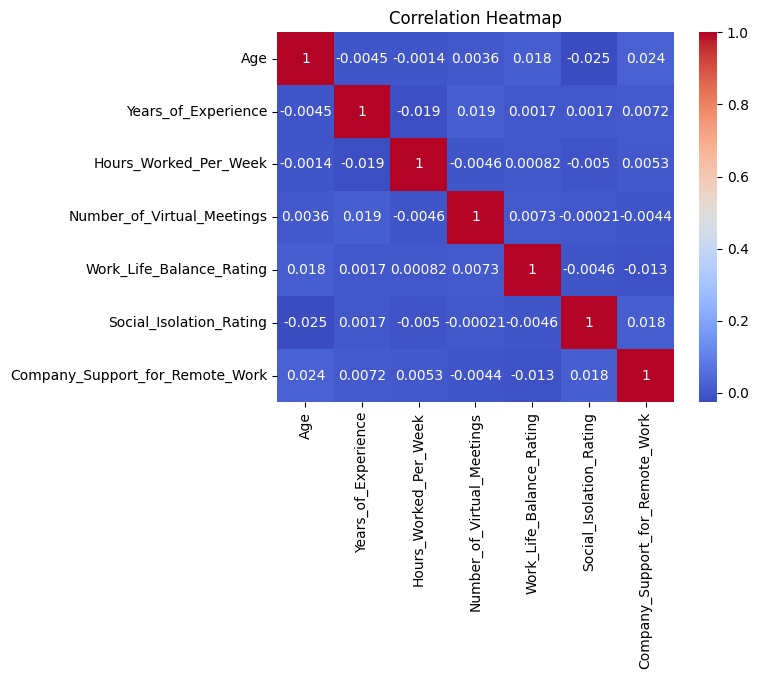

In [14]:
if not data_num.empty:
    corr = data_num.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Числовых признаков нет или они отсутствуют.")


In [76]:
# Создание копии с добавлением пропусков
data_nan = data.copy()
modify = data_num.columns.tolist()  # числовые признаки для добавления NaN
for i in range(15):
    random_part = data[modify].sample(frac=0.05, axis=0).sample(n=1, axis=1)
    index = random_part.index
    col = random_part.columns[0]
    data_nan.loc[index, col] = np.NaN

In [16]:
print(data_nan.isna().sum())

Employee_ID                             0
Age                                   486
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                  1125
Work_Location                           0
Hours_Worked_Per_Week                 250
Number_of_Virtual_Meetings            489
Work_Life_Balance_Rating              250
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating               719
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work       250
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [17]:
# Обработка пропусков различными методами
# Простое заполнение средним
simple_imputer = SimpleImputer(strategy='mean')
data_NA_mean = pd.DataFrame(simple_imputer.fit_transform(data_nan[modify]), columns=modify)

In [18]:
# KNN-импутиатор
knn_imputer = KNNImputer(n_neighbors=5)
data_NA_knn = pd.DataFrame(knn_imputer.fit_transform(data_nan[modify]), columns=modify)

In [78]:
# Итеративный импутиатор (RandomForest)
imp_iter = IterativeImputer(estimator=RandomForestRegressor())
data_NA_rf = pd.DataFrame(imp_iter.fit_transform(data_nan[modify]), columns=modify)


Сравнение методов заполнения пропусков

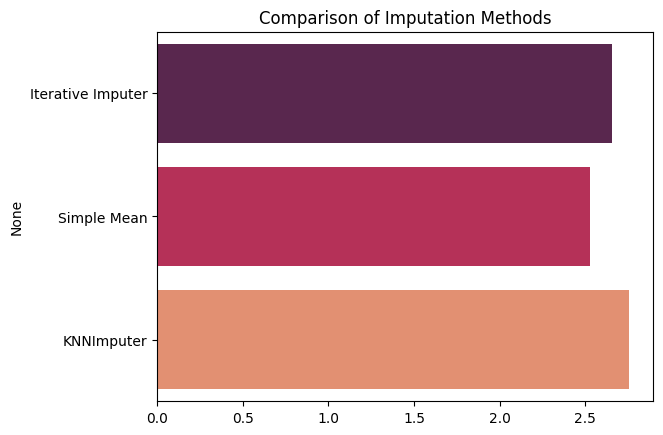

In [20]:
# Сравнение методов заполнения пропусков
datas = [data_NA_rf, data_NA_mean, data_NA_knn]
names = ['Iterative Imputer', 'Simple Mean', 'KNNImputer']
results = pd.Series(index=names)

for data_, name in zip(datas, names):
    results[name] = np.sqrt(np.mean((data[modify].fillna(0) - data_.fillna(0)) ** 2, axis=0).mean())

sns.barplot(y=results.index, x=results.values, palette='rocket', orient='h')
plt.title("Comparison of Imputation Methods")
plt.show()

**Пропуски**


In [21]:
print(data_NA_mean.isna().sum())

Age                                0
Years_of_Experience                0
Hours_Worked_Per_Week              0
Number_of_Virtual_Meetings         0
Work_Life_Balance_Rating           0
Social_Isolation_Rating            0
Company_Support_for_Remote_Work    0
dtype: int64


In [22]:
data_cat.head(15)

,Employee_ID,Gender,Job_Role,Industry,Work_Location,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,Non-binary,HR,Healthcare,Hybrid,Medium,Depression,No,Decrease,Unsatisfied,Weekly,Good,Europe
1,EMP0002,Female,Data Scientist,IT,Remote,Medium,Anxiety,No,Increase,Satisfied,Weekly,Good,Asia
2,EMP0003,Non-binary,Software Engineer,Education,Hybrid,Medium,Anxiety,No,No Change,Unsatisfied,NaN,Poor,North America
3,EMP0004,Male,Software Engineer,Finance,Onsite,High,Depression,Yes,Increase,Unsatisfied,NaN,Poor,Europe
4,EMP0005,Male,Sales,Consulting,Onsite,High,NaN,Yes,Decrease,Unsatisfied,Weekly,Average,North America
5,EMP0006,Non-binary,Sales,IT,Hybrid,High,NaN,No,Increase,Unsatisfied,NaN,Average,South America
6,EMP0007,Prefer not to say,Sales,IT,Remote,Low,Anxiety,Yes,Decrease,Neutral,Daily,Poor,Asia
7,EMP0008,Non-binary,Data Scientist,Manufacturing,Onsite,Medium,Depression,No,Decrease,Satisfied,NaN,Average,North America
8,EMP0009,Prefer not to say,Data Scientist,Healthcare,Hybrid,High,NaN,Yes,Decrease,Unsatisfied,Daily,Poor,Europe
9,EMP0010,Female,HR,IT,Hybrid,Low,Depression,Yes,Decrease,Neutral,Weekly,Poor,North America


Кодирование категорий


In [23]:
print("scikit-learn version:", sklearn.__version__)
print("category_encoders version:", category_encoders.__version__)

scikit-learn version: 1.6.0
category_encoders version: 2.6.4


In [24]:
data_nan['Gender'].value_counts()

,count
Gender,
Female,1274
Male,1270
Prefer not to say,1242
Non-binary,1214


In [25]:
data_nan['Satisfaction_with_Remote_Work']=data_nan['Satisfaction_with_Remote_Work'].astype('category')
data_nan['Satisfaction_with_Remote_Work']=data_nan['Satisfaction_with_Remote_Work'].cat.codes
data_nan['Satisfaction_with_Remote_Work'].value_counts()

,count
Satisfaction_with_Remote_Work,
2,1677
1,1675
0,1648


In [26]:
data_nan['Sleep_Quality']=data_nan['Sleep_Quality'].astype('category')
data_nan['Sleep_Quality']=data_nan['Sleep_Quality'].cat.codes
data_nan['Sleep_Quality'].value_counts()

,count
Sleep_Quality,
1,1687
2,1685
0,1628


In [27]:
data_nan['Productivity_Change']=data_nan['Productivity_Change'].astype('category')
data_nan['Productivity_Change']=data_nan['Productivity_Change'].cat.codes
data_nan['Productivity_Change'].value_counts()

,count
Productivity_Change,
0,1737
2,1677
1,1586


In [28]:
data_nan['Gender']=data_nan['Gender'].astype('category')
data_nan['Gender']=data_nan['Gender'].cat.codes
data_nan['Gender'].value_counts()

,count
Gender,
0,1274
1,1270
3,1242
2,1214


In [29]:
data_nan['Stress_Level'].value_counts()

,count
Stress_Level,
High,1686
Medium,1669
Low,1645


In [30]:
data_nan['Stress_Level']=data_nan['Stress_Level'].astype('category')
data_nan['Stress_Level']=data_nan['Stress_Level'].cat.codes
data_nan['Stress_Level'].value_counts()

,count
Stress_Level,
0,1686
2,1669
1,1645


In [31]:
data_nan['Work_Location'].value_counts()

,count
Work_Location,
Remote,1714
Hybrid,1649
Onsite,1637


In [32]:
data_nan['Work_Location']=data_nan['Work_Location'].astype('category')
data_nan['Work_Location']=data_nan['Work_Location'].cat.codes
data_nan['Work_Location'].value_counts()

,count
Work_Location,
2,1714
0,1649
1,1637


In [33]:
data_nan['Access_to_Mental_Health_Resources'].value_counts()

,count
Access_to_Mental_Health_Resources,
No,2553
Yes,2447


In [34]:
data_nan=pandas.get_dummies(data_nan,columns=['Access_to_Mental_Health_Resources','Physical_Activity','Region','Mental_Health_Condition'])

In [35]:
data_nan.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Physical_Activity_Weekly,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Mental_Health_Condition_Anxiety,Mental_Health_Condition_Burnout,Mental_Health_Condition_Depression
0,EMP0001,NaN,2,HR,Healthcare,13.0,0,47.0,7.0,2.0,...,True,False,False,True,False,False,False,False,False,True
1,EMP0002,40.0,0,Data Scientist,IT,NaN,2,52.0,4.0,1.0,...,True,False,True,False,False,False,False,True,False,False
2,EMP0003,59.0,2,Software Engineer,Education,NaN,0,46.0,11.0,5.0,...,False,False,False,False,True,False,False,True,False,False
3,EMP0004,27.0,1,Software Engineer,Finance,20.0,1,32.0,8.0,4.0,...,False,False,False,True,False,False,False,False,False,True
4,EMP0005,49.0,1,Sales,Consulting,32.0,1,35.0,12.0,2.0,...,True,False,False,False,True,False,False,False,False,False


In [36]:
encoder=category_encoders.BackwardDifferenceEncoder(cols=['Industry','Job_Role'])
encoder.fit(data_nan,verbose=1)

BackwardDifferenceEncoder(cols=['Industry', 'Job_Role'],
                          mapping=[{'col': 'Industry',
                                    'mapping':     Industry_0  Industry_1  Industry_2  Industry_3  Industry_4  Industry_5
 1   -0.857143   -0.714286   -0.571429   -0.428571   -0.285714   -0.142857
 2    0.142857   -0.714286   -0.571429   -0.428571   -0.285714   -0.142857
 3    0.142857    0.285714   -0.571429   -0.428571   -0.285714   -0.142857
 4    0.142857    0.285714    0.428571   -0.428571   -0...
 3    0.142857    0.285714   -0.571429   -0.428571   -0.285714   -0.142857
 4    0.142857    0.285714    0.428571   -0.428571   -0.285714   -0.142857
 5    0.142857    0.285714    0.428571    0.571429   -0.285714   -0.142857
 6    0.142857    0.285714    0.428571    0.571429    0.714286   -0.142857
 7    0.142857    0.285714    0.428571    0.571429    0.714286    0.857143
-1    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
-2    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000}])

In [37]:
data_nan=encoder.fit_transform(data_nan,verbose=1)

In [38]:
data_nan=data_nan.drop('Employee_ID',axis=1)

In [39]:
data_nan.head()

,intercept,Age,Gender,Job_Role_0,Job_Role_1,Job_Role_2,Job_Role_3,Job_Role_4,Job_Role_5,Industry_0,...,Physical_Activity_Weekly,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Mental_Health_Condition_Anxiety,Mental_Health_Condition_Burnout,Mental_Health_Condition_Depression
0,1,NaN,2,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.857143,...,True,False,False,True,False,False,False,False,False,True
1,1,40.0,0,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.142857,...,True,False,True,False,False,False,False,True,False,False
2,1,59.0,2,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,0.142857,...,False,False,False,False,True,False,False,True,False,False
3,1,27.0,1,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,0.142857,...,False,False,False,True,False,False,False,False,False,True
4,1,49.0,1,0.142857,0.285714,0.428571,-0.428571,-0.285714,-0.142857,0.142857,...,True,False,False,False,True,False,False,False,False,False


In [40]:
modify = data_nan.columns.to_list()
print(modify)

['intercept', 'Age', 'Gender', 'Job_Role_0', 'Job_Role_1', 'Job_Role_2', 'Job_Role_3', 'Job_Role_4', 'Job_Role_5', 'Industry_0', 'Industry_1', 'Industry_2', 'Industry_3', 'Industry_4', 'Industry_5', 'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Stress_Level', 'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work', 'Sleep_Quality', 'Access_to_Mental_Health_Resources_No', 'Access_to_Mental_Health_Resources_Yes', 'Physical_Activity_Daily', 'Physical_Activity_Weekly', 'Region_Africa', 'Region_Asia', 'Region_Europe', 'Region_North America', 'Region_Oceania', 'Region_South America', 'Mental_Health_Condition_Anxiety', 'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression']


In [41]:
# KNN-импутиатор
knn_imputer = KNNImputer(n_neighbors=5)
data_NA_knn = pd.DataFrame(knn_imputer.fit_transform(data_nan[modify]), columns=modify)

In [42]:
# Обработка пропусков различными методами
# Простое заполнение средним
simple_imputer = SimpleImputer(strategy='mean')
data_NA_mean = pd.DataFrame(simple_imputer.fit_transform(data_nan[modify]), columns=modify)

In [43]:
# Итеративный импутиатор (RandomForest)
imp_iter = IterativeImputer(estimator=RandomForestRegressor())
data_NA_rf = pd.DataFrame(imp_iter.fit_transform(data_nan[modify]), columns=modify)


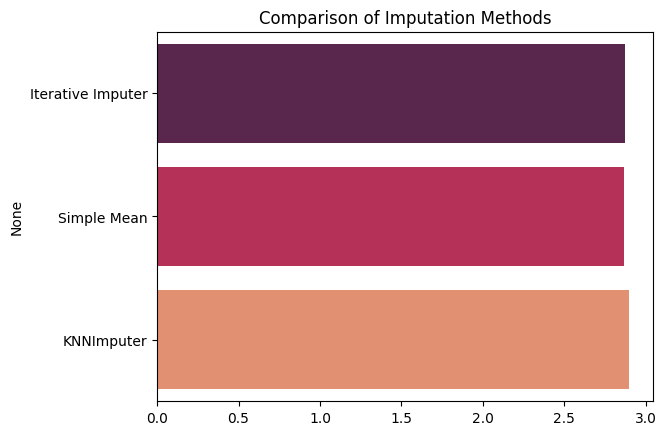

In [48]:
# Обновление modify после кодирования и обработки
modify = data_nan.columns.tolist()  # Все текущие столбцы после кодирования и обработки

# Сравнение методов заполнения пропусков
datas = [data_NA_rf, data_NA_mean, data_NA_knn]
names = ['Iterative Imputer', 'Simple Mean', 'KNNImputer']
results = pd.Series(index=names)

for data_, name in zip(datas, names):
    results[name] = np.sqrt(np.mean((data_nan[modify].fillna(0) - data_.fillna(0)) ** 2, axis=0).mean())

sns.barplot(y=results.index, x=results.values, palette='rocket', orient='h')
plt.title("Comparison of Imputation Methods")
plt.show()

In [45]:
data_NA_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   intercept                              5000 non-null   float64
 1   Age                                    5000 non-null   float64
 2   Gender                                 5000 non-null   float64
 3   Job_Role_0                             5000 non-null   float64
 4   Job_Role_1                             5000 non-null   float64
 5   Job_Role_2                             5000 non-null   float64
 6   Job_Role_3                             5000 non-null   float64
 7   Job_Role_4                             5000 non-null   float64
 8   Job_Role_5                             5000 non-null   float64
 9   Industry_0                             5000 non-null   float64
 10  Industry_1                             5000 non-null   float64
 11  Indu

In [46]:
print(data_NA_mean.isna().sum())

intercept                                0
Age                                      0
Gender                                   0
Job_Role_0                               0
Job_Role_1                               0
Job_Role_2                               0
Job_Role_3                               0
Job_Role_4                               0
Job_Role_5                               0
Industry_0                               0
Industry_1                               0
Industry_2                               0
Industry_3                               0
Industry_4                               0
Industry_5                               0
Years_of_Experience                      0
Work_Location                            0
Hours_Worked_Per_Week                    0
Number_of_Virtual_Meetings               0
Work_Life_Balance_Rating                 0
Stress_Level                             0
Productivity_Change                      0
Social_Isolation_Rating                  0
Satisfactio

In [49]:
from scipy.stats import zscore
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [75]:
# Оценка выбросов с использованием Z-оценки
z_scores = data_NA_mean.apply(zscore)
threshold = 3  # Порог для выбросов
outliers = (z_scores.abs() > threshold).any(axis=1)

print(f"Число выбросов: {outliers.sum()}")

Число выбросов: 0


In [60]:
# Удаление выбросов
data_no_outliers = data_NA_mean[~outliers]
print(f"Размер данных после удаления выбросов: {data_no_outliers.shape}")

Размер данных после удаления выбросов: (5000, 39)


In [61]:
# Применение метода главных компонент (PCA)
pca = PCA(n_components=3)  # Сжимаем пространство до 3-х компонент
data_pca = pca.fit_transform(data_no_outliers)

In [64]:
# Преобразуем в DataFrame для удобства
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3'])

In [66]:
# Добавление целевой переменной (например, 'Mental_Health_Condition') для визуализации
target_col = 'Stress_Level'
if target_col in data_nan.columns:
    data_pca_df[target_col] = data_nan.loc[data_no_outliers.index, target_col]
else:
    print(f"Целевая переменная '{target_col}' не найдена. Визуализируем относительно другого категориального признака.")
    target_col = 'Stress_Level'
    data_pca_df[target_col] = data_nan.loc[data_no_outliers.index, target_col]


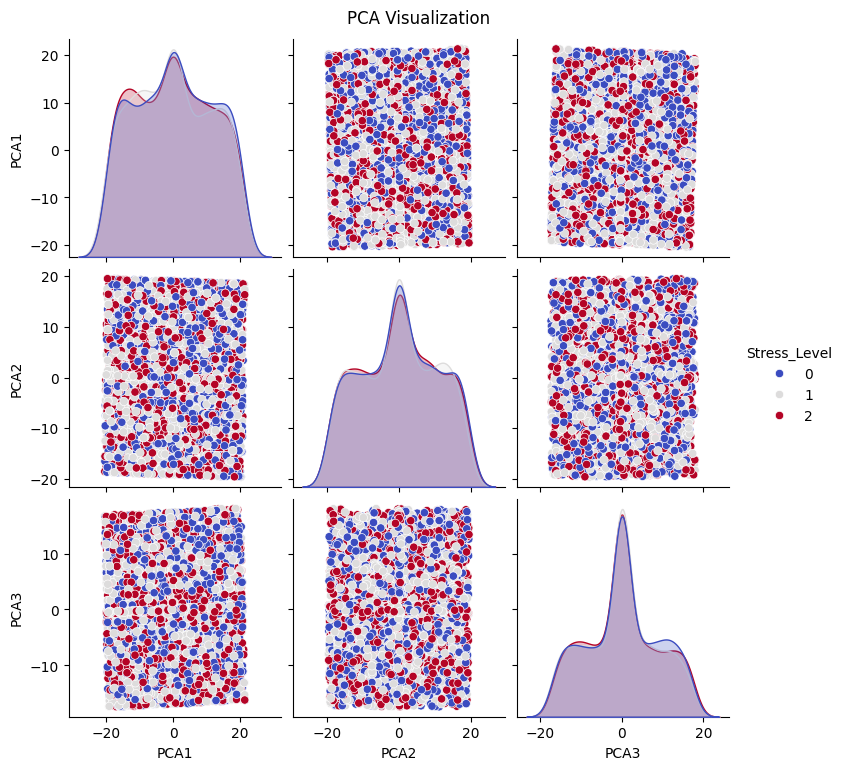

In [67]:
# Визуализация результатов
sns.pairplot(data_pca_df, hue=target_col, palette='coolwarm', diag_kind='kde')
plt.suptitle("PCA Visualization", y=1.02)
plt.show()

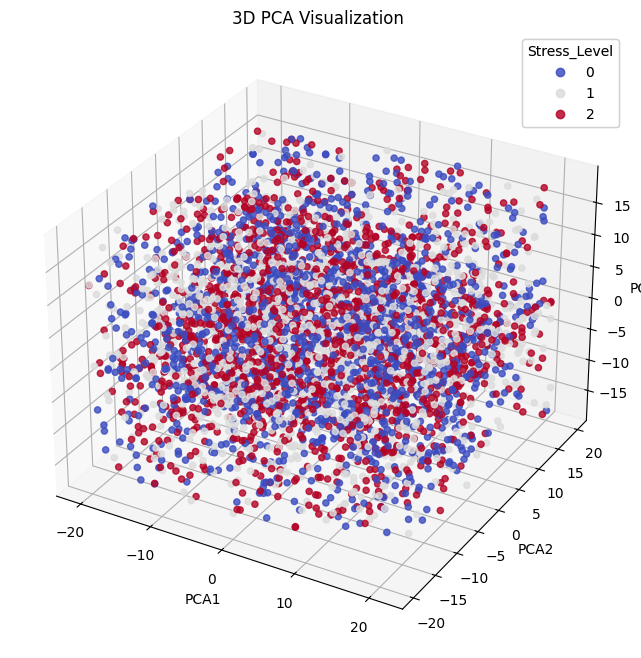

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_pca_df['PCA1'], data_pca_df['PCA2'], data_pca_df['PCA3'],
                     c=data_pca_df[target_col], cmap='coolwarm', alpha=0.8)
legend1 = ax.legend(*scatter.legend_elements(), title=target_col)
ax.add_artist(legend1)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("3D PCA Visualization")
plt.show()

In [69]:
# Выводы
print("Суммарная доля объясненной дисперсии для 3 компонент:", sum(pca.explained_variance_ratio_))

Суммарная доля объясненной дисперсии для 3 компонент: 0.9056619260980127
